<h1 style="text-align:center">Preço dos imoveis Predição</h1>
<img src='House-prices-975788.jpg'>
<h2 style="text-align:center">Objetivo:</h2>
<p style="text-align:center">Busca Relações entre o preço de venda de um imovel com suas caracteristicas e criação de um modelo preditivo para avaliar o valor de venda</p>
<h3 style="text-align:center">Dataset utilizado:</h3>
<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview"><p style="text-align:center">House Prices: Advanced Regression Techniques</p></a>

<h2 style="text-align:center">Bibliotecas Utilizadas:</h2>
<p style="text-align:center">Irei utilizar pandas para manipulação de dados e a limpeza do mesmo, matplotlib para vizualiar os dados e suas relaçoes junto a um grafico de scatter plot, da biblioteca sklearn utilizaremos a regressão linear e o train_test_split para separar os dados de forma randomica e a metrics para vizualiar a relação de treino de acerto e erro do nosso algoritmo</p>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

<h2 style="text-align:center">Importando os dataset:</h2>
<p style="text-align:center">Nesse caso temos dois dataset que já vieram separados um para treino e o outro para realizar a predição</p>

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h2 style="text-align:center">Ajustando Dataset:</h2>
<p style="text-align:center">Para ficar mais facil buscar a relação eu dei preferencia de renomear algumas colunas</p>

In [4]:
df_train.rename(columns = {'MSSubClass':'Classe de Construção','MSZoning ':'Classificacao geral de zoneamento','LotFrontage':'rua conectada a propriedade',
                          'LotArea':'Tamanho do lote','Street':'Rua','Alley':'Beco','LotShape':'Forma da propriedade','Utilities':'utilitarios','LotConfig':'Conf. Lote',
                          'LandSlope':'Declive da propriedade','Neighborhood':'Localizacao fisica do limite da cidade','Condition1':'Condicao_1','Condition2':'Condicao_2',
                          'BldgType':'Tipo de Habitacao','HouseStyle':'Estilo da Habitacao','OverallQual':'Material e acabamento','OverallCond':'Class geral das condicoes',
                          'Yearbuilt':'Data da construcao','YearRemodAdd':'Data de remodelacao','RoofStyle':'Tipo de telhado','RoofMatl':'Material do telhado','Heating':'Tipo Aquecimento',
                          'CentralAir':'Ar Condicionado central','Electrical':'Eletrica','FullBath':'Banheiros Completo','HalfBath':'Banheiros acima da serie','Kitchen':'Cozinhas',
                          'KitchenQual':'Qualidade Cozinha','SalePrice':'Preco Venda','GarageCars':'Lugares na Garagem','PoolArea':'Area da piscina','Fireplaces':'Lareiras'},inplace=True)

<p style="text-align:center">Do nosso dataset principal eu faço uma copia para outro e apenas seleciono as colunas numericas que são float e int e para que o modelo nao use a coluna Id eu dropo a mesma</p>

In [5]:
df2 = df_train.select_dtypes(include=['float64','int64'])

In [6]:
df2.drop(['Id'],1,inplace=True)

c:\users\drt903126\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
df2.columns

Index(['Classe de Construção', 'rua conectada a propriedade',
       'Tamanho do lote', 'Material e acabamento', 'Class geral das condicoes',
       'YearBuilt', 'Data de remodelacao', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'Banheiros Completo', 'Banheiros acima da serie', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Lareiras', 'GarageYrBlt',
       'Lugares na Garagem', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Area da piscina',
       'MiscVal', 'MoSold', 'YrSold', 'Preco Venda'],
      dtype='object')

<h1 style="text-align:center">Visualizando a relação de Preco X caracteristica</h1>
<h2 style="text-align:center">Scatter Plot:</h2>
<img src='ScatterPlot.PNG'>
<h2 style="text-align:center">Objetivo:</h2>
<p style="text-align:center">Buscar visualizar se algumas caracteristicas da casa podem interferir no valor final do imovel</p>

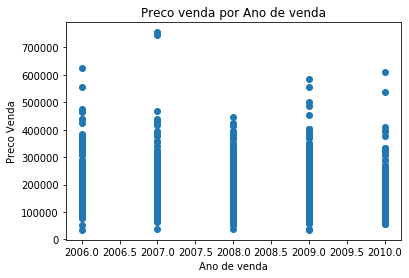

In [42]:
X = df2['YrSold']
Y = df2['Preco Venda']
plt.scatter(X,Y)
plt.title('Preco venda por Ano de venda')
plt.xlabel('Ano de venda')
plt.ylabel('Preco Venda')
#plt.savefig('ScatterPlot_01.png')
plt.show()

<h4>Pelo Grafico podemos observar que está bem distribuido de acordo com os anos ,assim podemos afirmar que o ano de venda do imovel não interferiu diretamente no valor de venda</h4>

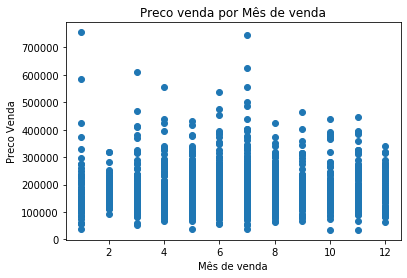

In [43]:
X = df2['MoSold']
Y = df2['Preco Venda']
plt.scatter(X,Y)
plt.title('Preco venda por Mês de venda')
plt.xlabel('Mês de venda')
plt.ylabel('Preco Venda')
#plt.savefig('ScatterPlot_01.png')
plt.show()

<h4>Pelo Grafico podemos observar que está bem distribuido de acordo com os meses ,assim podemos afirmar que o mês de venda do imovel não interferiu diretamente no valor de venda</h4>

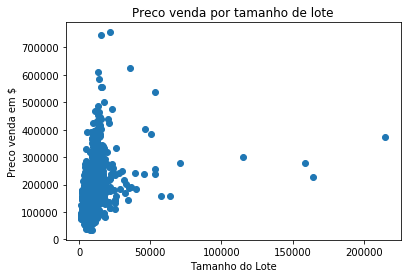

In [8]:
X = df2['Tamanho do lote']
Y = df2['Preco Venda']
plt.scatter(X,Y)
plt.title('Preco venda por tamanho de lote')
plt.xlabel('Tamanho do Lote')
plt.ylabel('Preco venda em $')
#plt.savefig('ScatterPlot_01.png')
plt.show()

<h4>Podemos ver pelo grafico acima que não há uma relação direta que nem sempre o tamanho do lote aumenta o valor da venda</h4>

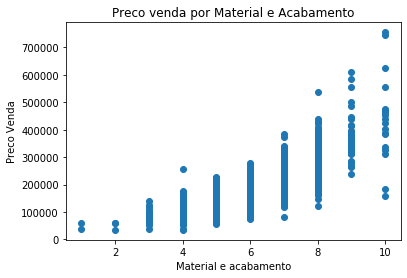

In [9]:
X = df2['Material e acabamento']
Y = df2['Preco Venda']
plt.scatter(X,Y)
plt.title('Preco venda por Material e Acabamento')
plt.xlabel('Material e acabamento')
plt.ylabel('Preco Venda')
#plt.savefig('ScatterPlot_01.png')
plt.show()

<h4>Analisando pouco mais a afundo,vemos que quanto melhor é a qualidade do material que foi usado na construção mais caro a mesma se torna</h4>

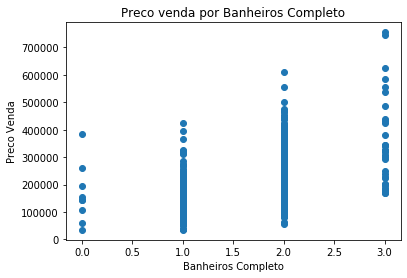

In [10]:
X = df2['Banheiros Completo']
Y = df2['Preco Venda']
plt.scatter(X,Y)
plt.title('Preco venda por Banheiros Completo')
plt.xlabel('Banheiros Completo')
plt.ylabel('Preco Venda')
#plt.savefig('ScatterPlot_01.png')
plt.show()

<h4>Tambem observamos que quanto maior numero de banheiros que temos na casa mais caro a mesma</h4>

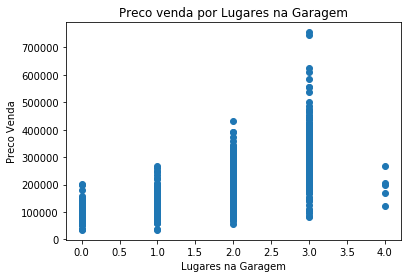

In [11]:
X = df2['Lugares na Garagem']
Y = df2['Preco Venda']
plt.scatter(X,Y)
plt.title('Preco venda por Lugares na Garagem')
plt.xlabel('Lugares na Garagem')
plt.ylabel('Preco Venda')
#plt.savefig('ScatterPlot_01.png')
plt.show()

<h4>com grafico vemos que normalmente as casas de maior valor se encontram com 3 vagas na garagem</h4>

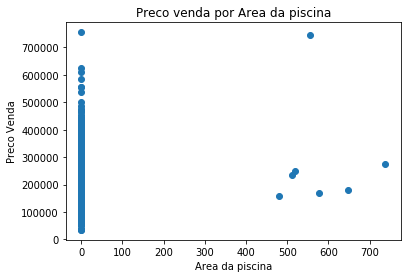

In [12]:
X = df2['Area da piscina']
Y = df2['Preco Venda']
plt.scatter(X,Y)
plt.title('Preco venda por Area da piscina')
plt.xlabel('Area da piscina')
plt.ylabel('Preco Venda')
#plt.savefig('ScatterPlot_01.png')
plt.show()

<h4>E não necessariamente o tamanho da piscina altera o valor do imovel</h4>

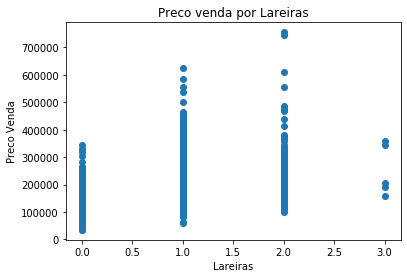

In [14]:
X = df2['Lareiras']
Y = df2['Preco Venda']
plt.scatter(X,Y)
plt.title('Preco venda por Lareiras')
plt.xlabel('Lareiras')
plt.ylabel('Preco Venda')
#plt.savefig('ScatterPlot_01.png')
plt.show()

<h4>Vemos que não necessariamente numero de lareiras que o imovel possui deixa o mesmo mais caro</h4>

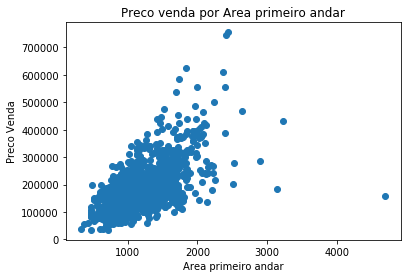

In [15]:
X = df2['1stFlrSF']
Y = df2['Preco Venda']
plt.scatter(X,Y)
plt.title('Preco venda por Area primeiro andar')
plt.xlabel('Area primeiro andar')
plt.ylabel('Preco Venda')
#plt.savefig('ScatterPlot_01.png')
plt.show()

<h4>Vemos que não há uma relação tão forte com o preço em relação ao tamanho da area do terreo conforme vimos acima pela area da casa</h4>

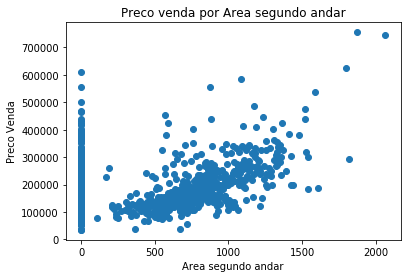

In [16]:
X = df2['2ndFlrSF']
Y = df2['Preco Venda']
plt.scatter(X,Y)
plt.title('Preco venda por Area segundo andar')
plt.xlabel('Area segundo andar')
plt.ylabel('Preco Venda')
#plt.savefig('ScatterPlot_01.png')
plt.show()

<h4>Mas já uma casa que tem um segundo andar temos uma distribuição um pouco maior</h4>

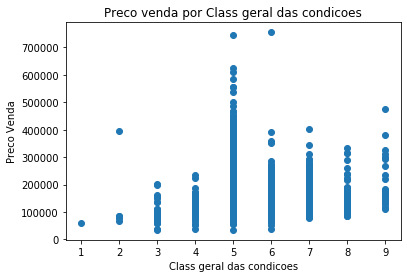

In [17]:
X = df2['Class geral das condicoes']
Y = df2['Preco Venda']
plt.scatter(X,Y)
plt.title('Preco venda por Class geral das condicoes')
plt.xlabel('Class geral das condicoes')
plt.ylabel('Preco Venda')
#plt.savefig('ScatterPlot_01.png')
plt.show()

<h4>Por fim a classificacao geral das condições da casa,onde podemos analisar que até 5 de classificação a mesma tende a aumentar seu valor</h4>

In [18]:
df2['rua conectada a propriedade'].fillna(0,inplace=True)

c:\users\drt903126\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<h4>Por ter algumas linhas na coluna Nº de ruas conectadas eu opto em zerar os valores Nulos</h4>

In [19]:
df2.isnull().sum()

Classe de Construção            0
rua conectada a propriedade     0
Tamanho do lote                 0
Material e acabamento           0
Class geral das condicoes       0
YearBuilt                       0
Data de remodelacao             0
MasVnrArea                      8
BsmtFinSF1                      0
BsmtFinSF2                      0
BsmtUnfSF                       0
TotalBsmtSF                     0
1stFlrSF                        0
2ndFlrSF                        0
LowQualFinSF                    0
GrLivArea                       0
BsmtFullBath                    0
BsmtHalfBath                    0
Banheiros Completo              0
Banheiros acima da serie        0
BedroomAbvGr                    0
KitchenAbvGr                    0
TotRmsAbvGrd                    0
Lareiras                        0
GarageYrBlt                    81
Lugares na Garagem              0
GarageArea                      0
WoodDeckSF                      0
OpenPorchSF                     0
EnclosedPorch 

In [20]:
df2.drop(['GarageYrBlt'],axis=1,inplace=True)

<h4>Como não irei utilizar o ano que a garagem foi criado preferi dropar a mesma</h4>

In [21]:
df2.columns

Index(['Classe de Construção', 'rua conectada a propriedade',
       'Tamanho do lote', 'Material e acabamento', 'Class geral das condicoes',
       'YearBuilt', 'Data de remodelacao', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'Banheiros Completo', 'Banheiros acima da serie', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Lareiras', 'Lugares na Garagem',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Area da piscina', 'MiscVal', 'MoSold', 'YrSold',
       'Preco Venda'],
      dtype='object')

In [22]:
df2.drop(['MasVnrArea'],axis=1,inplace=True)

<h1 style="text-align:center">Iniciando nosso modelo Preditivo</h1>
<img src='linearRegression.PNG'>
<h2 style="text-align:center">Objetivo:</h2>
<p style="text-align:center">Iremos separar nossas variaveis da nossa target onde a X se torna nosso Dataframe com as caracteristicas da casa e nosso Y a variavel Target que é o valor de venda</p>

In [23]:
X = df2.drop(['Preco Venda'],axis=1)
Y = df2['Preco Venda']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25) 
regr = LinearRegression()

In [24]:
regr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print(regr.intercept_)

519888.0857145259


In [26]:
print(regr.coef_)

[-1.60261847e+02  2.97349729e+01  3.86772073e-01  1.93181074e+04
  3.73742690e+03  3.47412658e+02  1.34157494e+02  6.86990608e+00
 -4.81844787e+00  8.78768827e-01  2.93022703e+00  2.24499379e+01
  2.03766641e+01 -1.18638517e+01  3.09627503e+01  1.06016406e+04
  2.67035183e+02  2.29533128e+03 -3.46093545e+03 -6.49752888e+03
 -1.34264811e+04  3.42789409e+03  2.99002850e+03  1.06161692e+04
  1.20018851e+00  3.01117614e+01  7.48294279e+00  4.59543193e+00
  2.28880315e+01  4.70607197e+01 -3.30813715e+01 -1.72588280e+00
  2.09900166e+02 -7.64466039e+02]


In [28]:
y_pred = regr.predict(X_test)

In [29]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.astype(int)})
df3

,Actual,Predicted
1039,80000,51494
170,128500,124538
543,133000,154386
68,80000,63174
644,370878,308406
375,61000,-9925
491,133000,165753
1370,105000,96406
484,132500,132008
749,98000,98752


<h2 style="text-align:center">Comparação modelo real x predict:</h2>
<p style="text-align:center">Iremos comparar as primeiras 25 linhas de nosso dataset para observar se o modelo preveu "proximo" aos valores de venda</p>

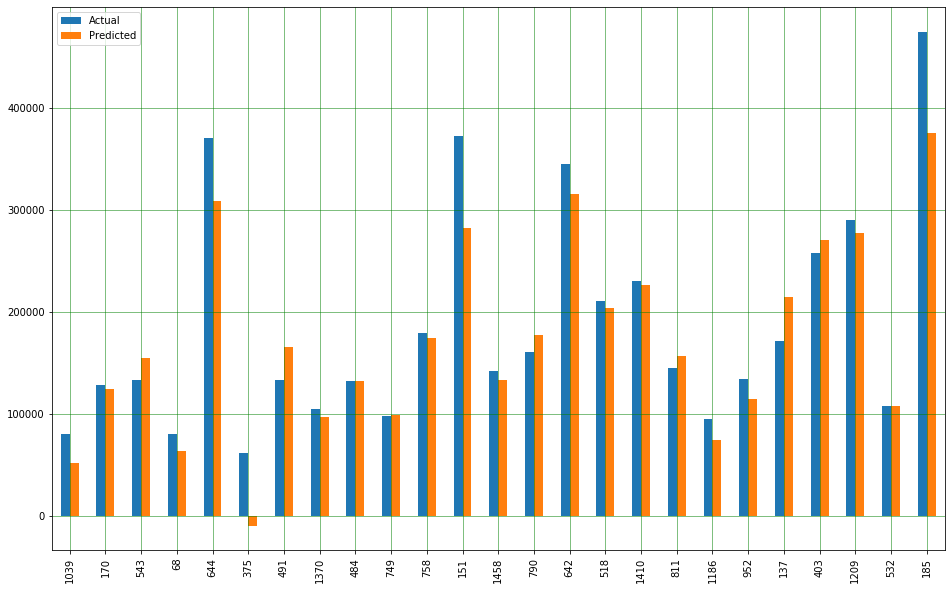

In [30]:
df1 = df3.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 25479.002695255243
Mean Squared Error: 1881291228.9833653
Root Mean Squared Error: 43373.85420945855


<h2 style="text-align:center">Aplicando no dataset test:</h2>
<p style="text-align:center">Agora iremos utilizar o nosso modelo treinado para tentar prever em cima do nosso dataset de teste</p>

In [35]:
df_test_final = df_test.select_dtypes(include=['float64','int64'])
df_test_final.drop(['Id'],1,inplace=True)
df_test_final.drop(['GarageYrBlt'],axis=1,inplace=True)
df_test_final.drop(['MasVnrArea'],axis=1,inplace=True)

c:\users\drt903126\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
df_test_final.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [37]:
df_test_final.isnull().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [38]:
df_test_final.fillna(0,inplace=True)

c:\users\drt903126\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [39]:
df_test_final['predict_final'] = regr.predict(df_test_final)

c:\users\drt903126\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_test_final['predict_final'] = df_test_final['predict_final'].astype(int)

c:\users\drt903126\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
df_test_final.head(15)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,predict_final
0,20,80.0,11622,5,6,1961,1961,468.0,144.0,270.0,...,140,0,0,0,120,0,0,6,2010,119182
1,20,81.0,14267,6,6,1958,1958,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,6,2010,140120
2,60,74.0,13830,5,5,1997,1998,791.0,0.0,137.0,...,212,34,0,0,0,0,0,3,2010,173028
3,60,78.0,9978,6,6,1998,1998,602.0,0.0,324.0,...,360,36,0,0,0,0,0,6,2010,201148
4,120,43.0,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,82,0,0,144,0,0,1,2010,199381
5,60,75.0,10000,6,5,1993,1994,0.0,0.0,763.0,...,157,84,0,0,0,0,0,4,2010,186899
6,20,0.0,7980,6,7,1992,2007,935.0,0.0,233.0,...,483,21,0,0,0,0,500,3,2010,199059
7,60,63.0,8402,6,5,1998,1998,0.0,0.0,789.0,...,0,75,0,0,0,0,0,5,2010,173955
8,20,85.0,10176,7,5,1990,1990,637.0,0.0,663.0,...,192,0,0,0,0,0,0,2,2010,210387
9,20,70.0,8400,4,5,1970,1970,804.0,78.0,0.0,...,240,0,0,0,0,0,0,4,2010,115047


<h1 style="text-align:center">Usando Random Forest</h1>
<img src='random.png'>
<p style="text-align:center">Florestas aleatórias ou florestas de decisão aleatória são um método de aprendizado conjunto para classificação, regressão e outras tarefas que operam construindo uma infinidade de árvores de decisão no momento do treinamento e produzindo a classe que é o modo das classes ou a previsão média das árvores individuais.</p>

In [64]:
X = df2.drop(['Preco Venda'],axis=1)
Y = df2['Preco Venda']
X_train, X_Test, Y_Train, y_test = train_test_split(X, Y,test_size = 0.2)

In [66]:
rf_model = RandomForestRegressor(n_estimators = 200, random_state = 0)

rf_model.fit(train_X,train_y)
print(mean_absolute_error(y_test,rf_model.predict(X_Test)))

8326.75100456621


In [67]:
test_preds = rf_model.predict(X_Test)

In [72]:
X_Test['Preco Venda'] = test_preds

c:\users\drt903126\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
X_Test.head(10)

,Classe de Construção,rua conectada a propriedade,Tamanho do lote,Material e acabamento,Class geral das condicoes,YearBuilt,Data de remodelacao,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Area da piscina,MiscVal,MoSold,YrSold,Preco Venda
1442,60,85.0,11003,10,5,2008,2008,765,0,252,...,168,52,0,0,0,0,0,4,2009,320990.245
913,90,82.0,6270,5,6,1949,1950,284,0,717,...,0,0,0,0,0,0,0,8,2007,139038.135
720,120,0.0,6563,8,5,1985,1985,1148,0,594,...,114,28,234,0,0,0,0,12,2006,280950.150
140,20,70.0,10500,4,5,1971,1971,432,0,432,...,0,0,0,0,0,0,0,4,2010,112695.500
347,20,0.0,17600,6,5,1960,1960,1270,0,208,...,0,40,0,0,0,0,0,12,2009,182994.410
237,60,0.0,9453,7,7,1993,2003,402,0,594,...,370,70,0,238,0,0,0,2,2010,202903.560
1342,60,0.0,9375,8,5,2002,2002,0,0,1284,...,192,87,0,0,0,0,0,8,2007,262116.460
248,60,72.0,11317,7,5,2003,2003,0,0,840,...,144,68,0,0,0,0,0,9,2007,194375.080
891,60,70.0,11184,6,5,1978,1978,226,500,192,...,243,0,0,0,0,0,0,7,2009,171998.250
15,45,51.0,6120,7,8,1929,2001,0,0,832,...,48,112,0,0,0,0,0,7,2007,144238.790


In [74]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': test_preds.astype(int)})
df4

,Actual,Predicted
1442,310000,320990
913,145000,139038
720,275000,280950
140,115000,112695
347,157500,182994
237,194500,202903
1342,228500,262116
248,180000,194375
891,172500,171998
15,132000,144238


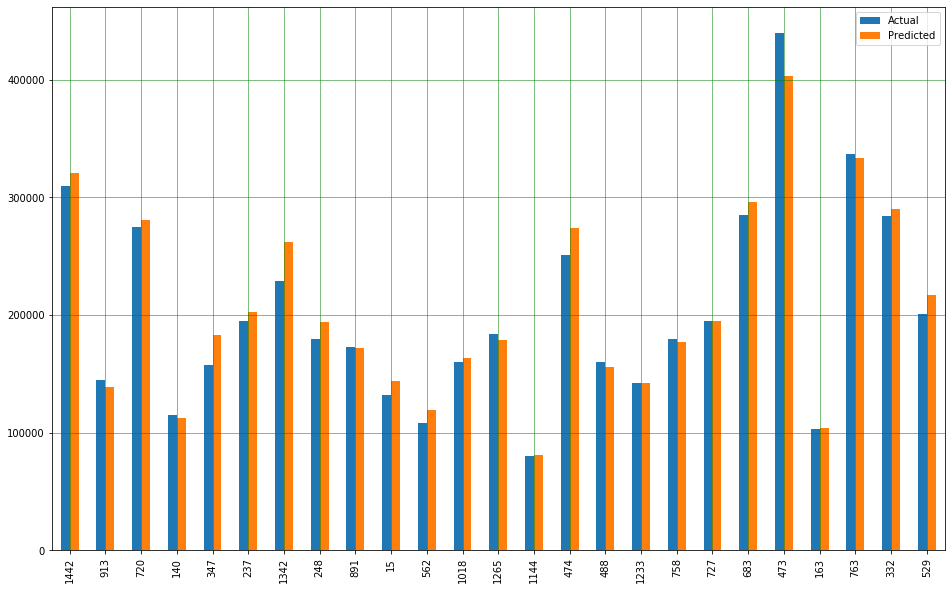

In [75]:
df6 = df4.head(25)
df6.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_preds))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_preds)))

Mean Absolute Error: 8326.75100456621
Mean Squared Error: 196699297.71783733
Root Mean Squared Error: 14024.952681483004
